In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
from sklearn.datasets import make_circles

np.random.seed(42)

X, y = make_circles(n_samples=4000, factor=.3, noise=0.05)
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [4]:
y.shape

(4000, 2)

In [5]:
np.sum(y, axis=0)

array([2000., 2000.])

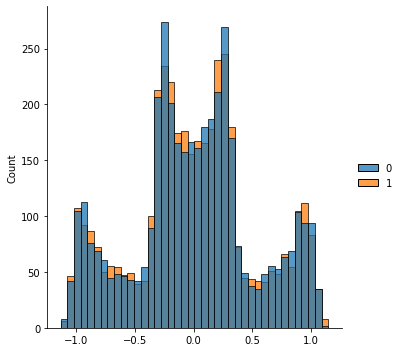

In [6]:
sns.displot(X)

In [7]:
# Test Effect of making X non-negative
# X = X + 2

# Define and Train Model

In [8]:
seed_everything(69)

In [9]:
MyFeedForward = FeedForward(2, [6, 6, 3, 3, 2], activation='tanh')

In [10]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=3, bias=True)
    (4): Linear(in_features=3, out_features=2, bias=True)
  )
)

In [11]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-3, num_epochs = 50, batch_size = 1000, rand_seed=142)

In [12]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [13]:
MyTrainer = Trainer(model = MySNN, scale_X = False, use_pca = False, n_components = 2)

In [14]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [15]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [16]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 50
__Training__
2021-03-09 02:34:28
MEAN LOSS: 0.72729580078125
__Validation__
2021-03-09 02:34:28
MEAN LOSS: 0.718162529753952
#########################################
Epoch 2 of 50
__Training__
2021-03-09 02:34:28
MEAN LOSS: 0.717526528930664
__Validation__
2021-03-09 02:34:29
MEAN LOSS: 0.7124983463922564
#########################################
Epoch 3 of 50
__Training__
2021-03-09 02:34:29
MEAN LOSS: 0.7118499237060547
__Validation__
2021-03-09 02:34:29
MEAN LOSS: 0.7077526775809905
#########################################
Epoch 4 of 50
__Training__
2021-03-09 02:34:29
MEAN LOSS: 0.7071472991943359
__Validation__
2021-03-09 02:34:30
MEAN LOSS: 0.7039952385436298
#########################################
Epoch 5 of 50
__Training__
2021-03-09 02:34:30
MEAN LOSS: 0.7031694458007812
__Validation__
2021-03-09 02:34:30
MEAN LOSS: 0.7002872909971661
#########################################


MEAN LOSS: 0.12812393035888672
__Validation__
2021-03-09 02:34:48
MEAN LOSS: 0.12539996122262373
#########################################
Epoch 46 of 50
__Training__
2021-03-09 02:34:48
MEAN LOSS: 0.12479246826171875
__Validation__
2021-03-09 02:34:49
MEAN LOSS: 0.12216080597775354
#########################################
Epoch 47 of 50
__Training__
2021-03-09 02:34:49
MEAN LOSS: 0.12158658103942871
__Validation__
2021-03-09 02:34:49
MEAN LOSS: 0.11904270127482719
#########################################
Epoch 48 of 50
__Training__
2021-03-09 02:34:49
MEAN LOSS: 0.11849983558654785
__Validation__
2021-03-09 02:34:50
MEAN LOSS: 0.11603966154137997
#########################################
Epoch 49 of 50
__Training__
2021-03-09 02:34:50
MEAN LOSS: 0.11552619400024414
__Validation__
2021-03-09 02:34:50
MEAN LOSS: 0.11314579391136136
#########################################
Epoch 50 of 50
__Training__
2021-03-09 02:34:50
MEAN LOSS: 0.11266003723144531
__Validation__
2021-03-09 02:34:51

MEAN LOSS: 0.1502377510070801
__Validation__
2021-03-09 02:35:11
MEAN LOSS: 0.14729079290299024
#########################################
Epoch 40 of 50
__Training__
2021-03-09 02:35:11
MEAN LOSS: 0.14599895782470704
__Validation__
2021-03-09 02:35:11
MEAN LOSS: 0.14316539953250695
#########################################
Epoch 41 of 50
__Training__
2021-03-09 02:35:11
MEAN LOSS: 0.14193781433105468
__Validation__
2021-03-09 02:35:12
MEAN LOSS: 0.13921083403964177
#########################################
Epoch 42 of 50
__Training__
2021-03-09 02:35:12
MEAN LOSS: 0.13804355850219727
__Validation__
2021-03-09 02:35:12
MEAN LOSS: 0.1354173322071587
#########################################
Epoch 43 of 50
__Training__
2021-03-09 02:35:12
MEAN LOSS: 0.1343067070007324
__Validation__
2021-03-09 02:35:13
MEAN LOSS: 0.13177579850575388
#########################################
Epoch 44 of 50
__Training__
2021-03-09 02:35:13
MEAN LOSS: 0.1307182964324951
__Validation__
2021-03-09 02:35:13
MEA

MEAN LOSS: 0.18013349990844726
__Validation__
2021-03-09 02:35:33
MEAN LOSS: 0.17632801354628871
#########################################
Epoch 34 of 50
__Training__
2021-03-09 02:35:33
MEAN LOSS: 0.17455690536499024
__Validation__
2021-03-09 02:35:34
MEAN LOSS: 0.1709139503733088
#########################################
Epoch 35 of 50
__Training__
2021-03-09 02:35:34
MEAN LOSS: 0.16924559020996094
__Validation__
2021-03-09 02:35:34
MEAN LOSS: 0.1657528194836085
#########################################
Epoch 36 of 50
__Training__
2021-03-09 02:35:34
MEAN LOSS: 0.16418057174682618
__Validation__
2021-03-09 02:35:35
MEAN LOSS: 0.1608293260356309
#########################################
Epoch 37 of 50
__Training__
2021-03-09 02:35:35
MEAN LOSS: 0.1593451416015625
__Validation__
2021-03-09 02:35:35
MEAN LOSS: 0.15612708502905956
#########################################
Epoch 38 of 50
__Training__
2021-03-09 02:35:35
MEAN LOSS: 0.15472396621704101
__Validation__
2021-03-09 02:35:35
MEA

MEAN LOSS: 0.22037644805908202
__Validation__
2021-03-09 02:35:56
MEAN LOSS: 0.21522774683474208
#########################################
Epoch 28 of 50
__Training__
2021-03-09 02:35:56
MEAN LOSS: 0.21261917572021485
__Validation__
2021-03-09 02:35:56
MEAN LOSS: 0.20773427364098715
#########################################
Epoch 29 of 50
__Training__
2021-03-09 02:35:56
MEAN LOSS: 0.20531395263671876
__Validation__
2021-03-09 02:35:56
MEAN LOSS: 0.20066992298747696
#########################################
Epoch 30 of 50
__Training__
2021-03-09 02:35:57
MEAN LOSS: 0.19841739349365234
__Validation__
2021-03-09 02:35:57
MEAN LOSS: 0.19399897715296432
#########################################
Epoch 31 of 50
__Training__
2021-03-09 02:35:57
MEAN LOSS: 0.1918932174682617
__Validation__
2021-03-09 02:35:57
MEAN LOSS: 0.1876779739970457
#########################################
Epoch 32 of 50
__Training__
2021-03-09 02:35:57
MEAN LOSS: 0.18570951232910157
__Validation__
2021-03-09 02:35:58
M

MEAN LOSS: 0.28002146911621095
__Validation__
2021-03-09 02:36:18
MEAN LOSS: 0.27172627865356114
#########################################
Epoch 22 of 50
__Training__
2021-03-09 02:36:18
MEAN LOSS: 0.2681615020751953
__Validation__
2021-03-09 02:36:18
MEAN LOSS: 0.2604829271455588
#########################################
Epoch 23 of 50
__Training__
2021-03-09 02:36:18
MEAN LOSS: 0.2572468299865723
__Validation__
2021-03-09 02:36:19
MEAN LOSS: 0.2501080991125236
#########################################
Epoch 24 of 50
__Training__
2021-03-09 02:36:19
MEAN LOSS: 0.2471440818786621
__Validation__
2021-03-09 02:36:19
MEAN LOSS: 0.24047662716100712
#########################################
Epoch 25 of 50
__Training__
2021-03-09 02:36:19
MEAN LOSS: 0.23774983139038086
__Validation__
2021-03-09 02:36:20
MEAN LOSS: 0.23150040071145786
#########################################
Epoch 26 of 50
__Training__
2021-03-09 02:36:20
MEAN LOSS: 0.2289772590637207
__Validation__
2021-03-09 02:36:20
MEAN 

In [17]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,1.0,train
1,1.0,train
2,1.0,train
3,1.0,train
4,1.0,train
0,1.0,test
1,1.0,test
2,1.0,test
3,1.0,test
4,1.0,test


<AxesSubplot:xlabel='stage', ylabel='score'>

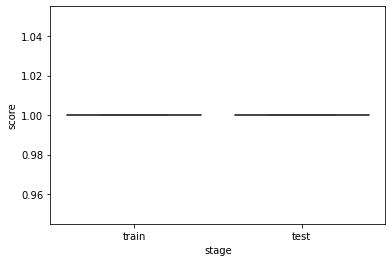

In [18]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

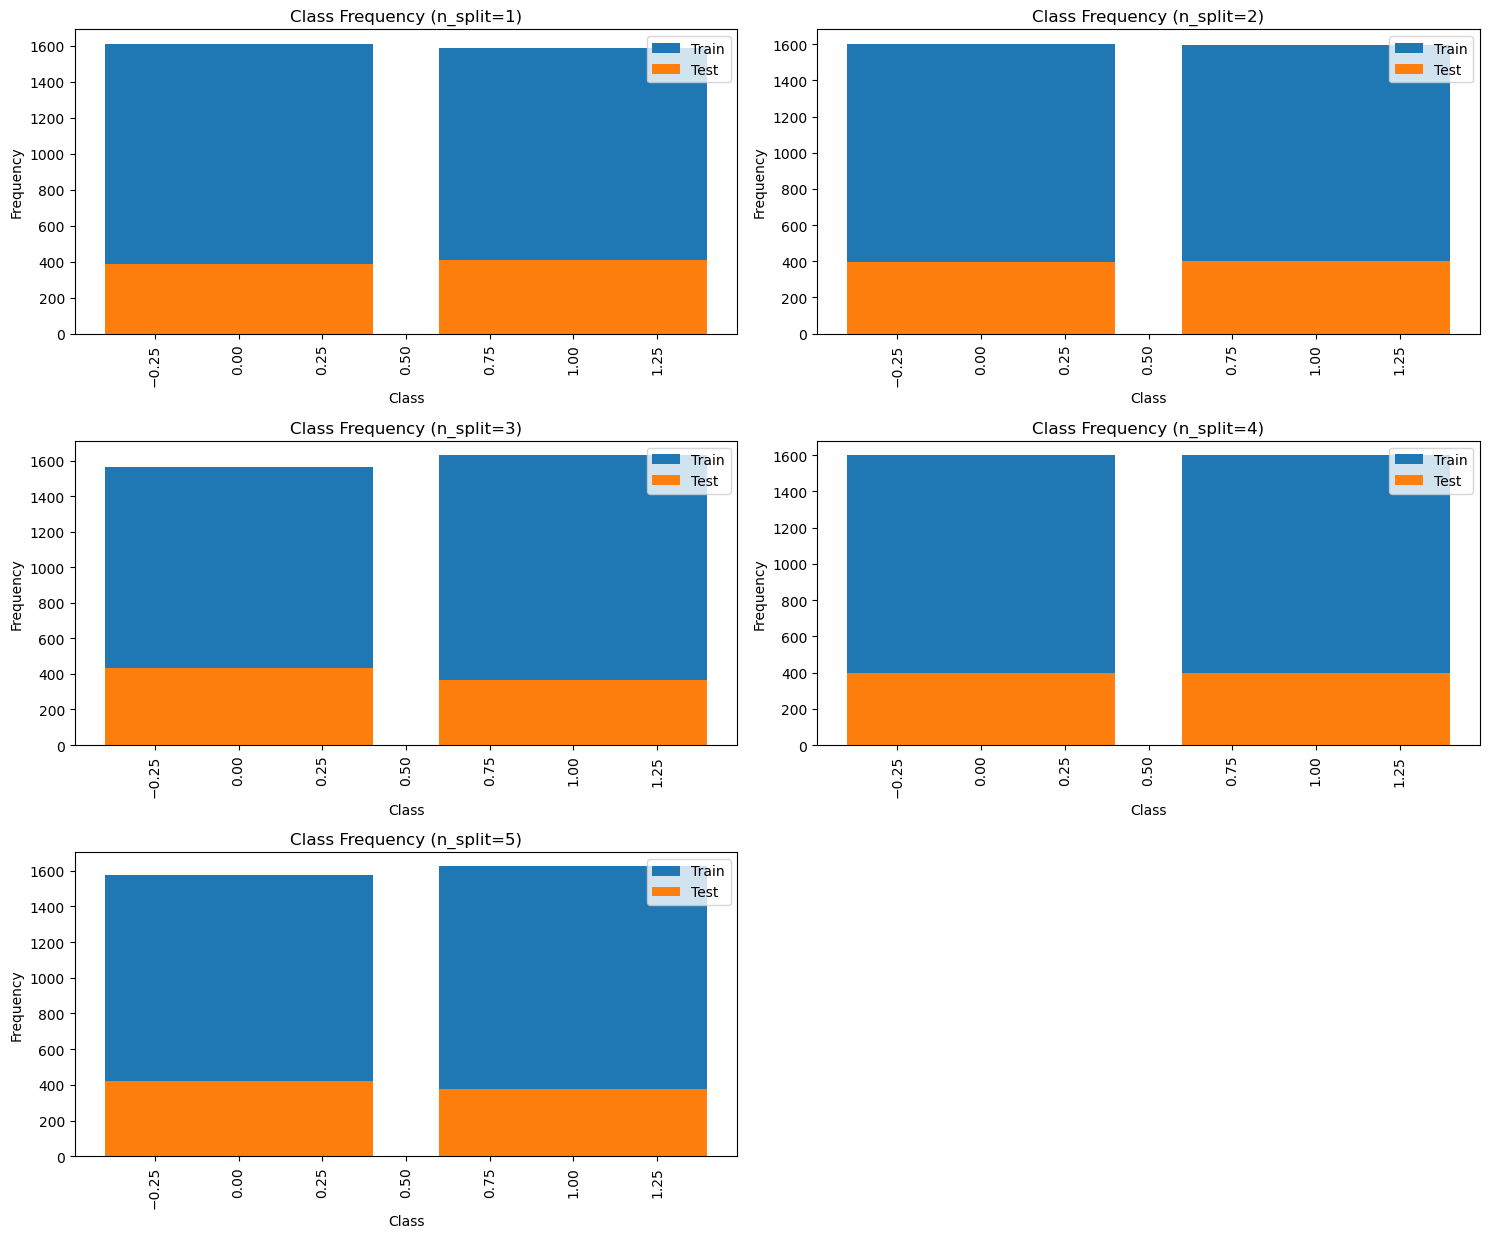

In [19]:
MyMultiTrainTester.plot_class_freq(normalize=True)

In [ ]:
MyMultiTrainTester.plot_confusion(normalize=True)

In [ ]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [ ]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [ ]:
X_transform = Trainer_use.transform_X(X)

In [ ]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [ ]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [ ]:
X_encoded.shape

In [ ]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')

In [ ]:
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [ ]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [ ]:
X_enc_df

In [ ]:
sns.displot(data=X_enc_df, x='X1', hue='y')

In [ ]:
sns.displot(data=X_enc_df, x='X2', hue='y')

In [ ]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

In [ ]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

In [ ]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

In [ ]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

In [ ]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Examine Misclassified Samples, or first sample if no misclassified samples

If no misclassified samples, show correcly classified sample

In [ ]:
X_db = Trainer_use.model.ClassDB['X_encoded'].detach().numpy()
X_db.shape

In [ ]:
y_db = Trainer_use.model.ClassDB['y'].detach().numpy()
y_db = Trainer_use.model.one_hot.inverse_transform(y_db).astype('str').flatten()

In [ ]:
db_df = pd.DataFrame(X_db, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
db_df['y'] = y_db

In [ ]:
db_df['y'].value_counts()

In [ ]:
do_plot(db_df, 'X1', 'X2', 'y')

In [ ]:
do_plot(db_df, 'X2', 'X3', 'y')

In [ ]:
X_enc_df['misclassified'] = X_enc_df['y'] != X_enc_df['y_pred']

In [ ]:
X_enc_df

In [ ]:
misclassified_idx = np.argwhere(X_enc_df['misclassified'].to_numpy()).flatten()
misclassified_idx

In [ ]:
if len(misclassified_idx) == 0:
    X_diff = torch.abs(torch.from_numpy(X_encoded[0, :] - X_db).to(torch.float32))
else:
    X_diff = torch.abs(torch.from_numpy(X_encoded[misclassified_idx[0], :] - X_db).to(torch.float32))
logistic_output = Trainer_use.model.logistic.forward(X_diff)

In [ ]:
logistic_output[y_db == '0', 1]

In [ ]:
# distribution of 0 label probabilities
sns.displot(logistic_output[y_db == '0', 1].detach().numpy())

In [ ]:
# distribution of 1 label probabilities
sns.displot(logistic_output[y_db == '1', 1].detach().numpy())

In [ ]:
torch.median(logistic_output[y_db == '0',1])

In [ ]:
torch.median(logistic_output[y_db == '1',1])

In [ ]:
X_diff_df = pd.DataFrame(X_diff, columns = ['X' + str(i+1) + '_diff' for i in range(X_encoded.shape[1])])
X_diff_df['y'] = y_db

In [ ]:
do_plot(X_diff_df, 'X1_diff', 'X2_diff', 'y')

In [ ]:
do_plot(X_diff_df, 'X2_diff', 'X3_diff', 'y')

In [ ]:
for p in Trainer_use.model.logistic.parameters():
    print(p)

### Examine Data In Original Space

In [ ]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df['y'] = y_label

In [ ]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')